In [89]:
from math import log
import operator
import numpy as np
import matplotlib.pyplot as plt
import os
#matplotlib要显示中文需要先添加字体
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [72]:
def createDataSet():
    """
    创建测试的数据集
    :return:
    """
    dataSet = [
        # 1
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 2
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
        # 3
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 4
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
        # 5
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 6
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '好瓜'],
        # 7
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', '好瓜'],
        # 8
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', '好瓜'],

        # ----------------------------------------------------
        # 9
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜'],
        # 10
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', '坏瓜'],
        # 11
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', '坏瓜'],
        # 12
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', '坏瓜'],
        # 13
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', '坏瓜'],
        # 14
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', '坏瓜'],
        # 15
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '坏瓜'],
        # 16
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', '坏瓜'],
        # 17
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜']
    ]

    # 特征值列表
    labels = ['色泽', '根蒂', '敲击', '纹理', '脐部', '触感']

    # 特征对应的所有可能的情况
    labels_full = {}

    for i in range(len(labels)):
        labelList = [example[i] for example in dataSet]
        uniqueLabel = set(labelList)
        labels_full[labels[i]] = uniqueLabel

    return dataSet, labels, labels_full

dataSet, labels, labels_full = createDataSet()
print(dataSet)
print(labels)
print(labels_full)

[['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'], ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'], ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'], ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'], ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'], ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '好瓜'], ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', '好瓜'], ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', '好瓜'], ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜'], ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', '坏瓜'], ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', '坏瓜'], ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', '坏瓜'], ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', '坏瓜'], ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', '坏瓜'], ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '坏瓜'], ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', '坏瓜'], ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜']]
['色泽', '根蒂', '敲击', '纹理', '脐部', '触感']
{'色泽': {'青绿', '浅白', '乌黑'}, '根蒂': {'稍蜷', '硬挺', '蜷缩'}, '敲击': {'清脆', '沉闷', '浊响'}, '纹理': {'清晰', '模糊', '稍糊'}, '脐部': {'凹陷', '平坦', '稍凹'}, '触感': {'硬滑', '软粘'}}


In [64]:
def calcShannonEnt(dataSet):
    #计算数据集（源）对应的信息熵
    m = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / m
        #numpy中也存在log函数，两者第二个参数不同，需要明确指出是哪个库的log函数
        shannonEnt = shannonEnt - prob * math.log(prob, 2)
    return shannonEnt


print(calcShannonEnt(dataSet))

0.9975025463691153


In [65]:
def splitDataSet(dataSet, axis, value):
    #根据选择的属性和值获取新节点对应的训练数据集
    retDataSet = []
    featVec = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet

#print(splitDataSet(dataSet, 0, '乌黑'))

In [66]:
def chooseBestFeatureTopSplit(dataSet):
    #找到每一回合的最优属性
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

#print(chooseBestFeatureTopSplit(dataSet))


In [67]:
def majorityCnt(classList):
#找到类别中出现次数最多的类别，想对多数投票法
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1),
                             reverse=True)
    print(sortedClassCount)
    return sortedClassCount[0][0]

print(majorityCnt(np.asarray(dataSet)[:, -1]))

[('坏瓜', 9), ('好瓜', 8)]
坏瓜


In [68]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureTopSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueValue = set(featValues)
    for value in uniqueValue:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree


print(list(createTree(dataSet, labels).keys())[0])
#print(myTree.keys())


纹理


In [69]:
decisionNode = dict(boxstyle='square,pad=0.5', fc='0.9')
leafNode = dict(boxstyle='round4, pad=0.5', fc='0.9')
arrow_args = dict(arrowstyle='<-', connectionstyle='arc3', shrinkA=0, shrinkB=16)

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,
                           xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction',
                           va='top', ha='center', bbox=nodeType, arrowprops=arrow_args)



In [73]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == "dict":
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid,txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            print(key)
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),
                    cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

{'纹理': {'清晰': {'根蒂': {'稍蜷': {'色泽': {'青绿': '好瓜', '乌黑': {'触感': {'硬滑': '好瓜', '软粘': '坏瓜'}}}}, '硬挺': '坏瓜', '蜷缩': '好瓜'}}, '模糊': '坏瓜', '稍糊': {'触感': {'硬滑': '坏瓜', '软粘': '好瓜'}}}}
清晰
稍蜷
乌黑
稍糊


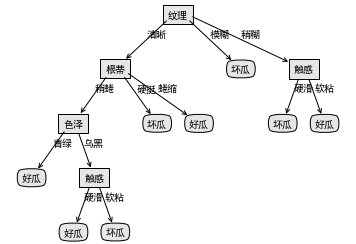

In [74]:
t = createTree(dataSet, labels)
print(t)
createPlot(t)

In [75]:
def classify(decisionTree, featLabels, testVec):
    #py3中keys()返回的是dict_key类型，需要再转换成list进行索引
    firstStr = list(decisionTree.keys())[0]
    secondDict = decisionTree[firstStr]
    featIndex = featLabels.index(firstStr)
    classLabel = None;
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels,
                                     testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [78]:
labels2 = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
testData = ['浅白', '蜷缩', '浊响', '稍糊', '凹陷', '硬滑']
testClass = classify(t, labels2, testData)
print (testClass)

坏瓜


In [86]:
def storeTree(decisionTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(decisionTree, fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    if os.path.isfile(filename):
        fr = open(filename)
        return pickle.load(fr)
    else:
        return None

In [90]:
fileName = r'TreeFile.txt'
storeTree(t, fileName)

print(grabTree('TreeFile.txt'))

UnicodeDecodeError: 'CP_UTF8' codec can't decode byte 0x80 in position 0: No mapping for the Unicode character exists in the target code page.